In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
from scipy.ndimage import gaussian_filter1d


import matplotlib.pyplot as plt
import plotly.express as px
import plotly.io as pio
import plotly.graph_objects as go

import elephant
import quantities as pq
import neo
import viziphant

from seqnmf import seqnmf


from drn_interactions.spikes import SpikesHandler
from drn_interactions.load import load_derived_generic, load_neurons

<AxesSubplot:xlabel='session_name'>

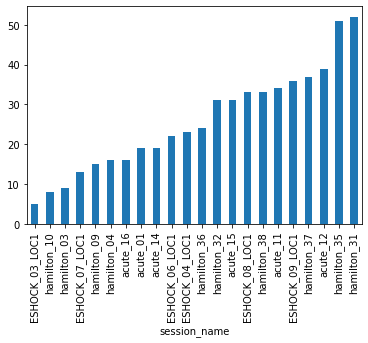

In [2]:
neurons = load_neurons()
neurons.groupby("session_name").apply(len).sort_values().plot(kind="bar")

In [696]:
t_start= 0
t_stop = t_start + 600
session_name = "hamilton_31"
bin_width = 1
sh = SpikesHandler(block="pre", bin_width=bin_width , session_names=[session_name], t_stop=t_stop, t_start=t_start)
# df = sh

In [697]:
from scipy.ndimage import gaussian_filter1d
from sklearn.preprocessing import QuantileTransformer, MinMaxScaler


df = sh.binned_piv
# df = df.astype(float).apply(gaussian_filter1d, sigma=1)
df = pd.DataFrame(MinMaxScaler().fit_transform(df), columns=df.columns, index=df.index)

X = MinMaxScaler().fit_transform(df.transpose())

0.8302808613095902


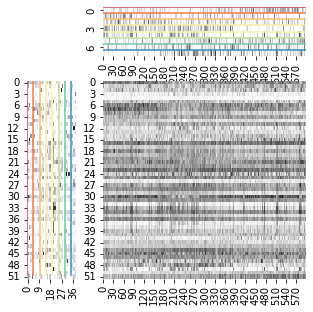

In [710]:
from seqnmf import plot


W, H, cost, loadings, power = seqnmf(
    X, 
    K=8,
    L=5,
    Lambda=0.00000000000001,
    )
print(power)

plot(W, H).show()

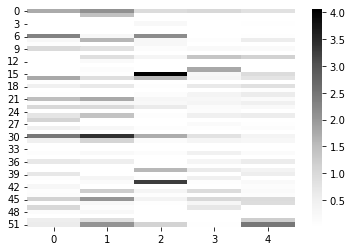

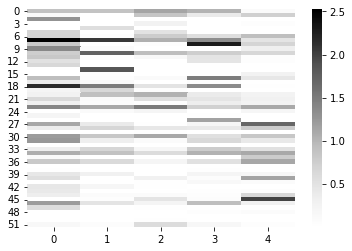

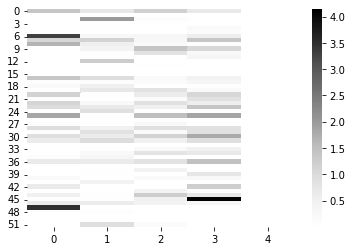

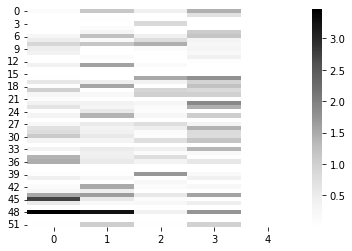

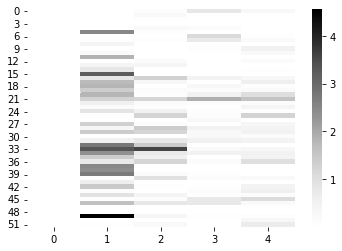

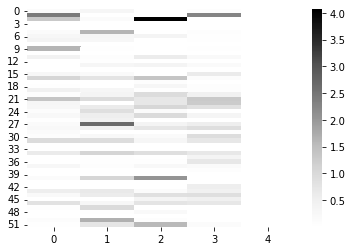

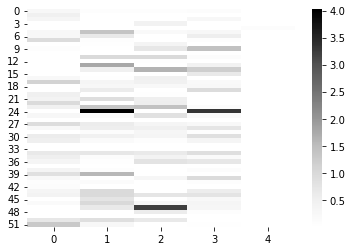

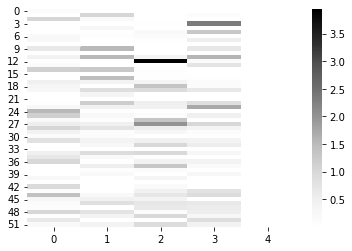

In [711]:

W.shape[0]
for i in range(W.shape[1]):
    plt.figure()
    sns.heatmap(W[:, i, :], cmap="Greys")

    idx = np.argsort(np.max(W[:, i, :], axis=1))
    dfp = pd.DataFrame(W[:, i, :])
    dfp = dfp.sort_values([c for c in dfp.columns])
    # dfp = dfp.sort_values(dfp.columns[zscore(dfp.sum()) > -3].tolist())
    # sns.heatmap(dfp, cmap="Greys", robust=True)
    # dfp.sum().plot()